# Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from ydata_profiling import ProfileReport  



# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge

# Support Vector Regression
from sklearn.svm import SVR

# Decision Tree & Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Boosting Methods
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  # Optional, if using LightGBM
# from catboost import CatBoostRegressor  # Optional, if using CatBoost

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor

# Extra Trees (Extremely Randomized Trees)
from sklearn.ensemble import ExtraTreesRegressor

# Multi-layer Perceptron (Neural Network)
from sklearn.neural_network import MLPRegressor



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle
import mlflow 
import dvc 


import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [24]:
# Load dataset
df = pd.read_csv("D:\\Salary-Prediction-\\data\\Salary Data.csv")  # Change to your dataset

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
# Create the profile report
profile = ProfileReport(df, explorative=True)

# Display the report inside the Jupyter Notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
df.shape

(375, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [13]:
## checking the values of the data
null_values = df.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


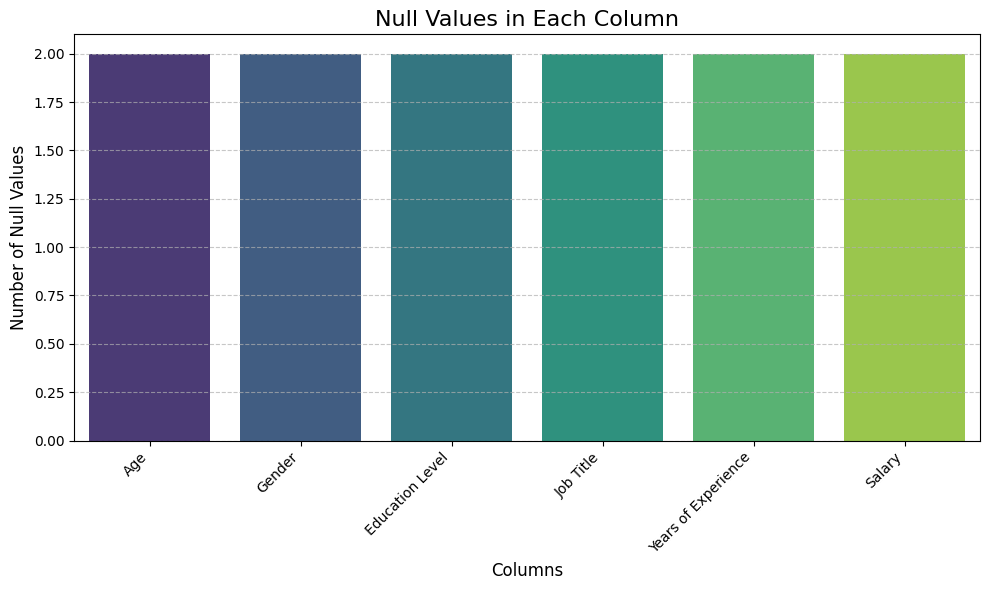

In [16]:
# Plot the null values
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')

# Add plot labels and title
plt.title("Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Null Values", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
null_percentages = (df.isnull().sum() / len(df)) * 100

print(f"Percentage of null values:\n{null_percentages}")


Percentage of null values:
Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [29]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [30]:
# Calculate percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the percentages
print("Percentage of Null Values in Each Column:")
print(null_percentage)

Percentage of Null Values in Each Column:
Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
dtype: float64


In [33]:
# Check for duplicate rows in the entire dataframe
duplicates = df[ df.duplicated() ]
# If you want to check the number of duplicates
num_duplicates = df.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 50


In [34]:
# Remove duplicate rows
df = df.drop_duplicates()

In [35]:
# If you want to check the number of duplicates
df.duplicated().sum()

0

In [36]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [18]:
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [19]:
df.describe()

,Age,Years of Experience,Salary
count,325.000000,325.000000,325.000000
mean,37.382867,10.058556,99987.468756
std,7.174747,6.640199,48577.143840
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,37.000000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [20]:
correlation_matrix = df.describe().corr()
correlation_matrix

,Age,Years of Experience,Salary
Age,1.000000,0.995781,-0.321310
Years of Experience,0.995781,1.000000,-0.360281
Salary,-0.321310,-0.360281,1.000000


Univariate Analysis (Single Column Analysis)<br>
Numerical Features (Age, Years of Experience, Salary)

📊 Histogram & KDE Plot – Check distribution

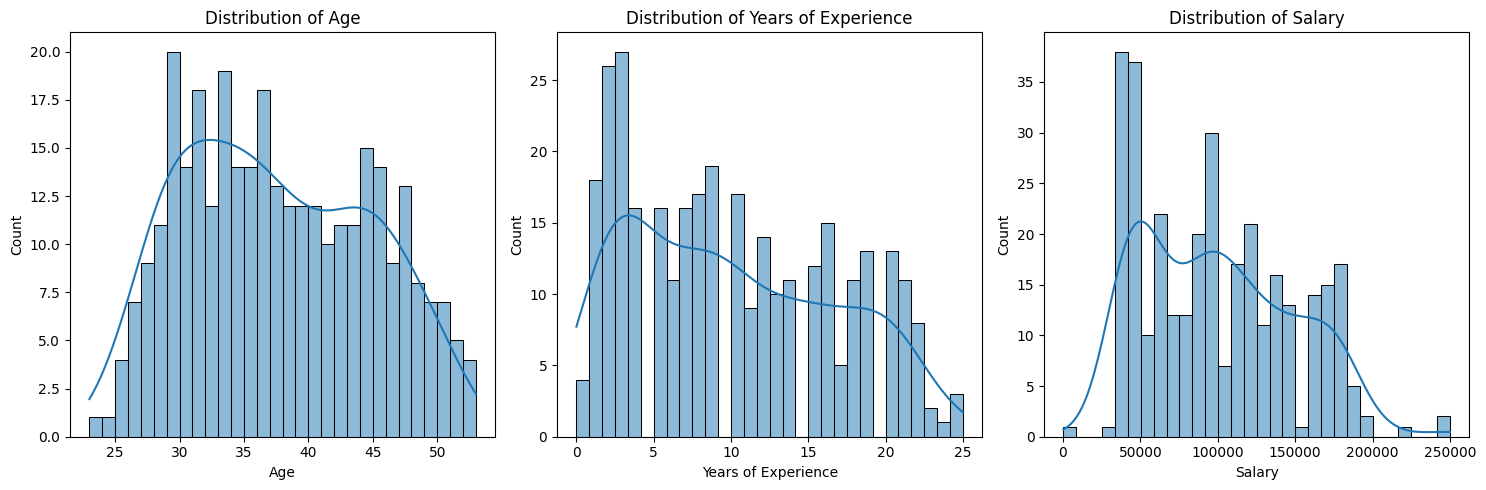

In [21]:
num_cols = ['Age', 'Years of Experience', 'Salary']

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 5))  # Create subplots in a single row

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()  # Adjust spacing
plt.show()


In [22]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Categorical Features <br>
<br>
📊 Bar Plots for Frequency Distribution

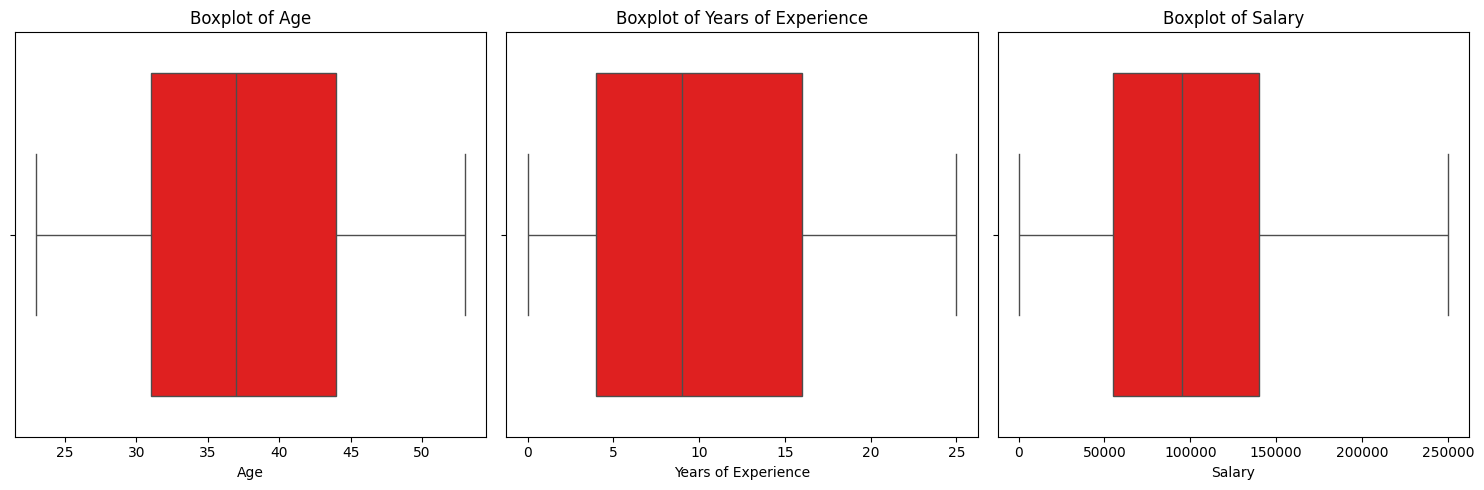

In [23]:
num_cols = ['Age', 'Years of Experience', 'Salary']

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 5))  # Create subplots in a single row

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i],color="r")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Categorical Features


<br>
📊 Bar Plots for Frequency Distribution

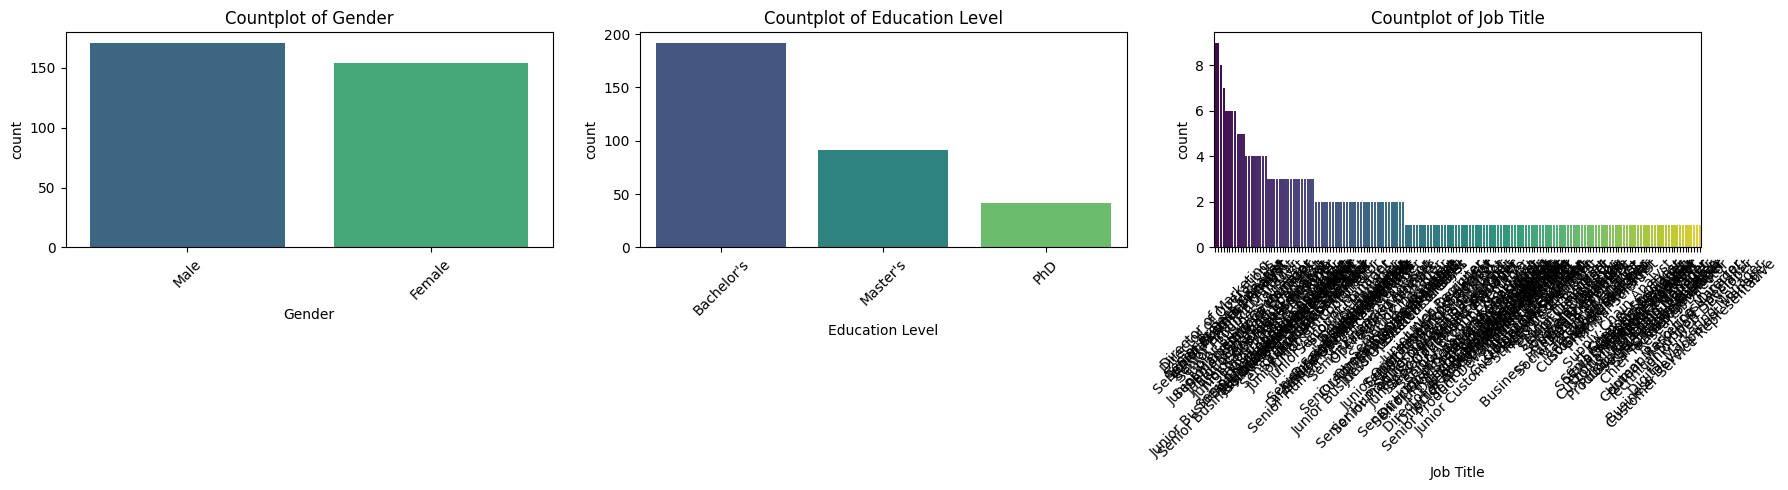

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Gender', 'Education Level', 'Job Title']

fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 5))  # Create subplots in a single row

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i], palette= 'viridis')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    axes[i].set_title(f"Countplot of {col}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


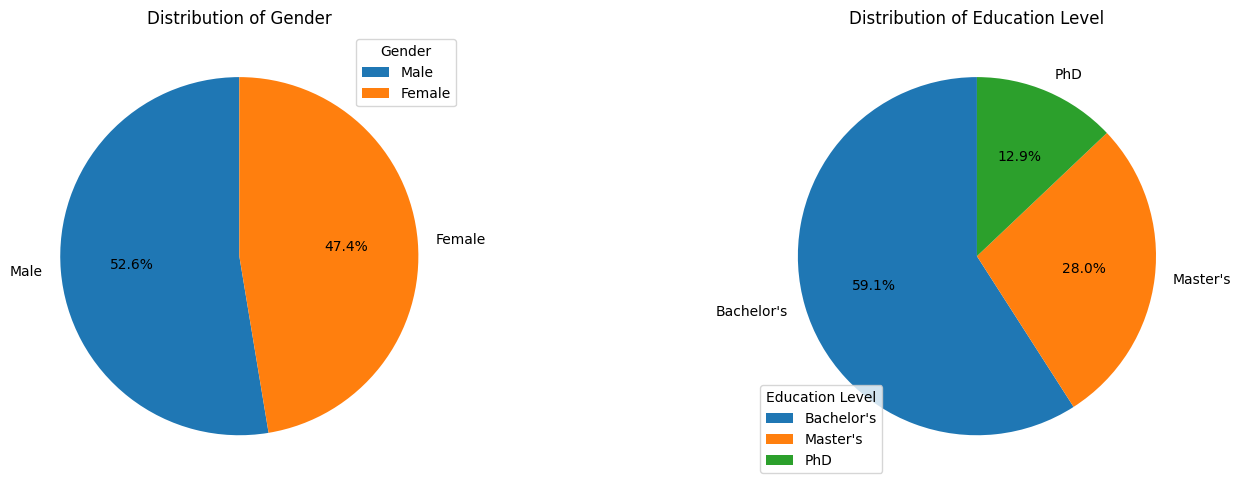

In [25]:
import matplotlib.pyplot as plt

# Define categorical columns
cat_cols = ['Gender', 'Education Level']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Loop through categorical columns and plot pie charts
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()  # Count unique values
    wedges, texts, autotexts = axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    
    # Add legend
    axes[i].legend(wedges, counts.index, title=col, loc="best")
    
    # Set title
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


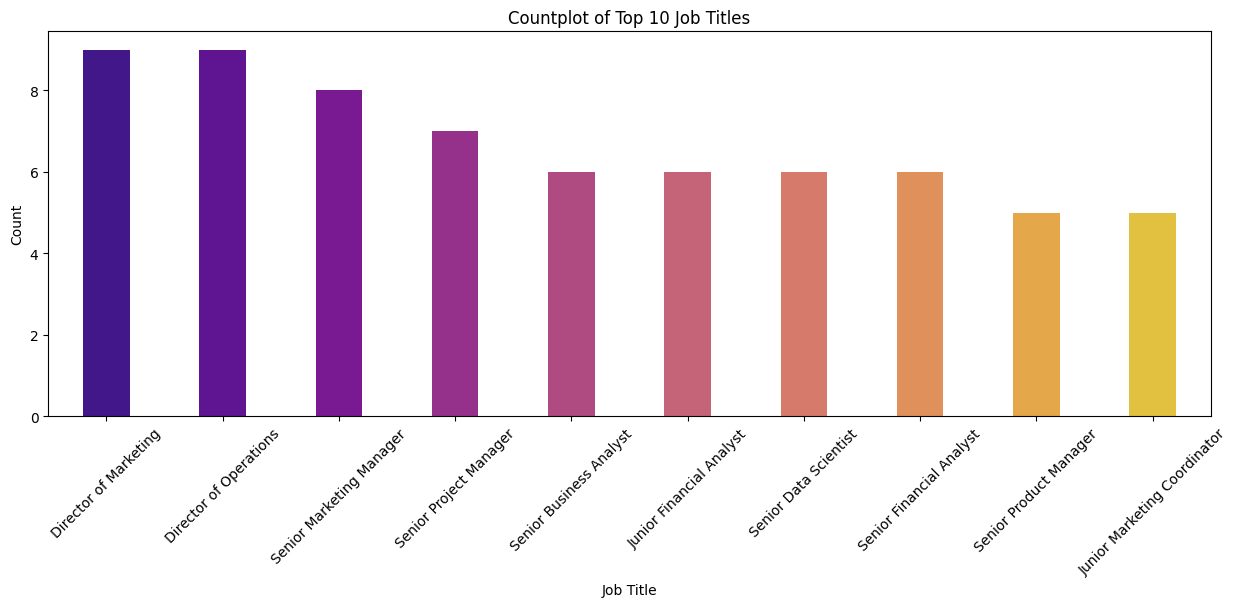

In [26]:
plt.figure(figsize=(15, 5))

# Select top 10 job titles by count
top_10_jobs = df['Job Title'].value_counts().nlargest(10).index

# Create countplot only for the top 10 job titles
sns.countplot(x=df['Job Title'], order=top_10_jobs, palette= 'plasma',width=0.4)

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title("Countplot of Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()


In [27]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Gender: 2 unique values
Education Level: 3 unique values


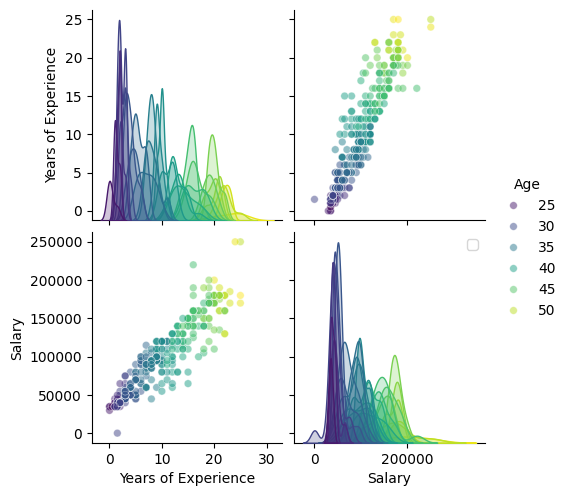

In [28]:
# Create a pair plot for the dataset
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 30}, palette= 'viridis',hue = 'Age')
plt.legend()

# Show the plot
plt.show()


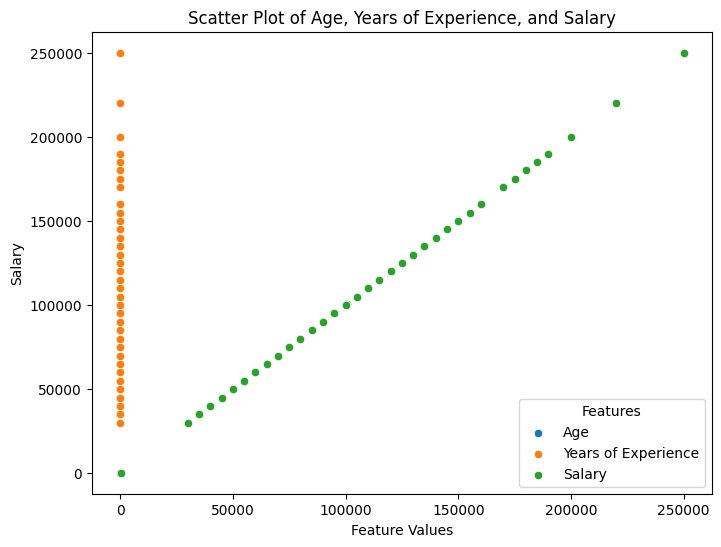

In [29]:
# Define numerical columns
num_cols = ['Age', 'Years of Experience', 'Salary']

# Create scatter plot for each pair
plt.figure(figsize=(8, 6))

# Loop through numerical columns and plot
for col in num_cols:
    sns.scatterplot(x=df[col], y=df['Salary'], label=col)

# Labels and title
plt.xlabel("Feature Values")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age, Years of Experience, and Salary")

# Add legend
plt.legend(title="Features")

# Show the plot
plt.show()


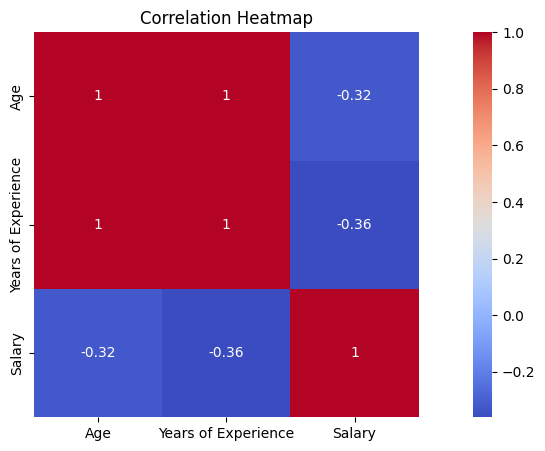

In [30]:
plt.figure(figsize=(14, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

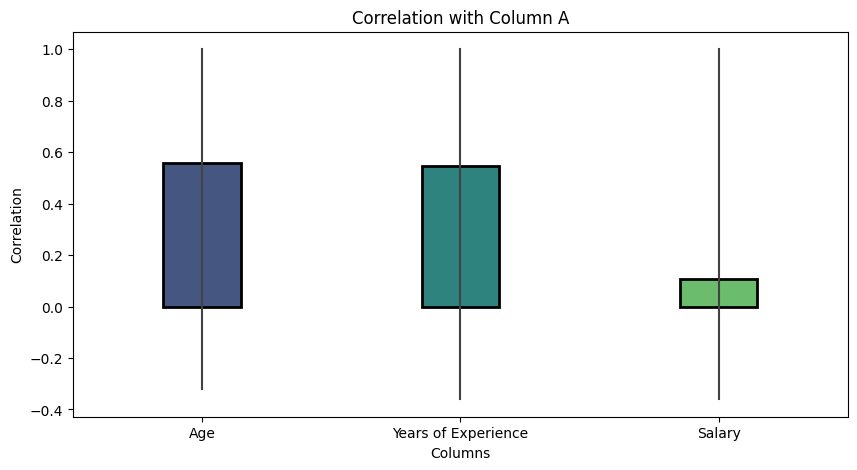

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,errwidth=1.5,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    # here one have postive co - relation 
plt.show()

In [32]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Model buliding 

In [33]:
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [34]:
print(numerical_features)
print(categorical_features)

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')
Index(['Gender', 'Education Level', 'Job Title'], dtype='object')


In [35]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),  
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_features)
])

In [36]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'Years of Experience', 'Salary'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Gender', 'Education Level', 'Job Title'], dtype='object'))])

In [37]:
X = df.drop('Salary',axis = 1)
y = df['Salary']

In [38]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0


In [52]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [40]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (325, 5) , shape : (325,) 


In [41]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
172,37.431635,Male,Bachelor's,Director of Marketing,10.030831
183,27.000000,Male,Bachelor's,Junior Product Manager,2.000000
17,39.000000,Male,PhD,Senior Engineer,12.000000
24,41.000000,Male,Master's,Financial Manager,13.000000
132,40.000000,Female,Master's,Senior Training Specialist,12.000000


In [43]:
X_test.head()

,Age,Gender,Education Level,Job Title,Years of Experience
235,32.0,Male,Bachelor's,Junior Sales Representative,3.0
110,42.0,Female,Master's,Senior Graphic Designer,15.0
249,47.0,Male,Master's,Director of Operations,20.0
9,38.0,Male,PhD,Senior Scientist,10.0
93,52.0,Female,Master's,Senior Marketing Manager,25.0


In [54]:
y_test.head()

235     45000.0
110    110000.0
249    170000.0
9      110000.0
93     170000.0
Name: Salary, dtype: float64

In [53]:
y_train.head()

172    100577.345845
183     40000.000000
17     115000.000000
24     140000.000000
132    100000.000000
Name: Salary, dtype: float64

In [44]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)


X_train shape: (260, 5) X_test shape : (65, 5) y_train shape : (260,) y_test shape :  (65,)


In [45]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "GaussianProcess": GaussianProcessRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "MLPRegressor": MLPRegressor()
}

In [46]:
# Define hyperparameter grids
param_grids = {
    "Ridge": {"regressor__alpha": [0.1, 1.0, 10.0]},
    "Lasso": {"regressor__alpha": [0.1, 1.0, 10.0]},
    "ElasticNet": {"regressor__alpha": [0.1, 1.0, 10.0]},
    "SVR": {"regressor__C": [0.1, 1, 10], "regressor__kernel": ['linear', 'rbf']},
    "DecisionTree": {"regressor__max_depth": [None, 10, 20]},
    "RandomForest": {"regressor__n_estimators": [50, 100], "regressor__max_depth": [None, 10]},
    "GradientBoosting": {"regressor__n_estimators": [50, 100], "regressor__learning_rate": [0.01, 0.1]},
    "AdaBoost": {"regressor__n_estimators": [50, 100]},
    "XGBRegressor": {"regressor__n_estimators": [50, 100], "regressor__learning_rate": [0.01, 0.1]},
    "LGBMRegressor": {"regressor__n_estimators": [50, 100], "regressor__learning_rate": [0.01, 0.1]},
    "KNeighbors": {"regressor__n_neighbors": [3, 5, 7]},
    "ExtraTrees": {"regressor__n_estimators": [50, 100]},
    "MLPRegressor": {"regressor__hidden_layer_sizes": [(50,), (100,)]}
}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Error with LinearRegression: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Salary-Prediction-\venv\lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Salary'

The above exception was the 

In [49]:
print(y_train.head())
print(y_train)


172    100577.345845
183     40000.000000
17     115000.000000
24     140000.000000
132    100000.000000
Name: Salary, dtype: float64
172    100577.345845
183     40000.000000
17     115000.000000
24     140000.000000
132    100000.000000
           ...      
188    180000.000000
71      70000.000000
106     50000.000000
283     35000.000000
102    150000.000000
Name: Salary, Length: 260, dtype: float64
